In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats


In [2]:
# Read saved data
Skills_List_db = pd.read_csv("Resources/Skills_Priority_List_2022.csv")

# Display sample data
Skills_List_db.head()

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,111111,Chief Executive or Managing Director,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
1,111211,Corporate General Manager,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
2,121111,Aquaculture Farmer,NS,Moderate,NS,NS,S,NS,NS,NS,S,NS
3,121311,Apiarist,S,Moderate,S,S,S,S,NS,S,S,S
4,121312,Beef Cattle Farmer,NS,Soft,R,NS,S,NS,NS,NS,S,NS


In [14]:
Shortage = Skills_List_db["Current National Labour Market Rating"].value_counts()

NS    628
S     278
R       8
Name: Current National Labour Market Rating, dtype: int64

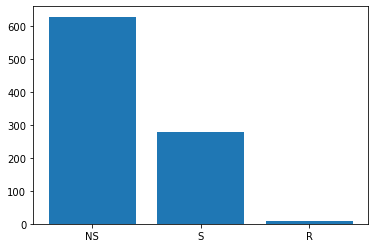

In [33]:
x_axis= Shortage.index

y_axis = Shortage.values

plt.bar(x_axis, y_axis, align="center")

Shortage

array([628, 278,   8], dtype=int64)

In [30]:
Future_Demand = Skills_List_db["National Future Demand Rating"].value_counts()

Moderate    572
Strong      234
Soft        108
Name: National Future Demand Rating, dtype: int64

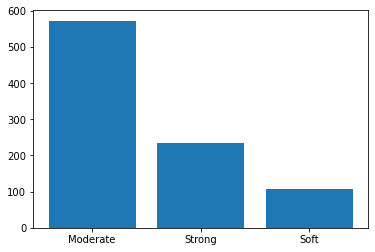

In [32]:
x_axis= Future_Demand.index

y_axis = Future_Demand.values

plt.bar(x_axis, y_axis, align="center")

Future_Demand

In [9]:
NSW_data = Skills_List_db.loc[(Skills_List_db["Current National Labour Market Rating"]=="S") & (Skills_List_db["National Future Demand Rating"]=="Strong")& (Skills_List_db["NSW"]=="S"),:]

In [10]:
NSW_data

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
35,132511,Research and Development Manager,S,Strong,S,S,S,S,S,S,S,S
63,139914,Quality Assurance Manager,S,Strong,S,S,S,S,S,S,S,S
211,233212,Geotechnical Engineer,S,Strong,S,S,S,S,S,S,S,S
220,233611,Mining Engineer (excluding Petroleum),S,Strong,S,S,S,S,S,S,S,S
221,233612,Petroleum Engineer,S,Strong,S,S,S,S,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
829,712211,Driller,S,Strong,S,S,S,S,S,S,S,S
830,712212,Miner,S,Strong,S,S,S,S,S,S,S,S
878,821412,Home Improvement Installer,S,Strong,S,S,S,S,NS,S,S,S
885,831211,Meat Boner and Slicer,S,Strong,S,S,S,S,NS,S,S,S


In [35]:
# Read saved data
Glassdoor_db = pd.read_csv("Resources/glassdoor_reviews.csv")

# Display sample data
Glassdoor_db.head()



London, England, England        58665
New York, NY                    31172
Bangalore                       28102
Hyderābād                       11458
Mumbai                           9543
                                ...  
Northampton, MA                     1
Syracuse, UT                        1
Alsīsar                             1
Cinderford, England, England        1
Bedwas, Wales, Wales                1
Name: location, Length: 14487, dtype: int64

In [39]:
# Display sample data
Glassdoor_db.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [37]:
Locs = Glassdoor_db.location.value_counts()

In [38]:
Locs.to_csv("Output_data/Locations.csv")

In [42]:
Glassdoor_db_Aus = Glassdoor_db.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)

AttributeError: 'DataFrame' object has no attribute 'str'

In [48]:
Glassdoor_db_Aus = Glassdoor_db.location.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)


In [50]:
Glassdoor_db_Aus.value_counts()

False    540469
True        759
Name: location, dtype: int64

In [52]:
Data= Glassdoor_db.loc[Glassdoor_db.location.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False) == True,:]

In [53]:
Data.head()


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
5265,ASDA,2021-02-04,Technician,"Current Employee, less than 1 year","Perth, Western Australia, Western Australia",4,5.0,5.0,5.0,5.0,5.0,5.0,o,x,o,happy place,"bad furniture, great food. amazing people","hard days, lots of work"
9608,Accor,2016-04-23,GSA,Current Employee,"Perth, Western Australia, Western Australia",2,3.0,4.0,NaN,2.0,2.0,3.0,x,o,x,GSA Multiple hotels,"Global chain, easy relocation opportunities. s...",Every hotel its its own kingdom run differentl...
9920,Accor,2019-07-25,Reception,"Former Employee, more than 3 years","Perth, Western Australia, Western Australia",1,1.0,1.0,NaN,1.0,1.0,1.0,o,o,o,stay away,none- really bad\r\nworse place i have ever wo...,poor management\r\npassive aggressive manageme...
10010,Accor,2020-04-15,Regional Technical Manager,Current Employee,"Perth, Western Australia, Western Australia",4,4.0,4.0,NaN,4.0,4.0,4.0,v,v,r,Good,international hotel company widely recognize,"As a large multinational companies, local appr..."
10127,Accor,2020-11-09,Anonymous Employee,"Former Employee, more than 8 years","Perth, Western Australia, Western Australia",4,3.0,4.0,5.0,4.0,3.0,4.0,v,v,v,Hotel company,"Great place to work, company looks after its p...",Systems can be an issue


In [54]:
Data.to_csv("Output_data/Glassdoor_Aus_Data.csv")